In [1]:
import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calcula_duracion_curso_platzi_2020(url):
    r2 = requests.get(url)
    soup = BeautifulSoup(r2.content, 'html.parser')
    tiempos = soup.find_all('p', class_='MaterialItem-copy-time')
    titulo = soup.find('h1').get_text()
    #if soup.find(class_='CourseLevel-label') != None:
    nivel = soup.find(class_='CourseLevel-label').get_text()
    #else:
    #    nivel = np.nan
    minutos = []
    segundos = []
    j = 0
    for linea in tiempos:
        i = 0
        for e in linea:
            tmp = ''
            if i == 2:
                minutos.append(e)
            elif i == 8:
                segundos.append(e)
            i +=1
    minu = []
    for minuto in minutos:
        minu.append(int(minuto))
    segu = []
    for segundo in segundos:
        segu.append(int(segundo.split(" ")[0]))
    segundos=sum(minu)*60 + sum(segu)
    return titulo, segundos, nivel

In [2]:
cursos_url = ["https://platzi.com/clases/pensamiento-logico/", 
             'https://platzi.com/clases/programacion-basica/', 
             'https://platzi.com/clases/git-github/',
             'https://platzi.com/clases/programacion-estructurada/',
             'https://platzi.com/clases/oop/',
             'https://platzi.com/clases/probabilidad-estadistica/',
             'https://platzi.com/clases/algoritmos/',
             'https://platzi.com/clases/fundamentos-matematicas/',
             'https://platzi.com/clases/python-practico/',
             'https://platzi.com/clases/calculo-datos/',
             'https://platzi.com/clases/discretas/',
             'https://platzi.com/clases/calculo-multivariable/',
             'https://platzi.com/clases/machine-learning/',
             'https://platzi.com/clases/fundamentos-ml/',
             'https://platzi.com/clases/ia/',
             'https://platzi.com/clases/algebra-lineal/',
             'https://platzi.com/clases/algebra-ml/',
             'https://platzi.com/clases/scikit/',
             'https://platzi.com/clases/deep-learning/',
             'https://platzi.com/clases/analisis-predictivo/',
             'https://platzi.com/clases/dialogflow/',
             'https://platzi.com/clases/bots-fb/']

In [3]:
#tiempos = soup.find_all('p', class_='MaterialItem-copy-time')
#titulo = soup.find('h1').get_text()

In [4]:
duraciones_segundos = []
titulos_cursos = []
orden = []
niveles = []
i = 0
for curso in cursos_url:
    titulos, dura, nivel = calcula_duracion_curso_platzi_2020(curso)
    duraciones_segundos.append(dura)
    titulos_cursos.append(titulos)
    niveles.append(nivel)
    i += 1
    orden.append(i)

In [5]:
durac_form = []
for dur in duraciones_segundos:
    durac_form.append(str(datetime.timedelta(seconds=dur)))

In [6]:
df = pd.DataFrame({
    "Orden_ruta": orden,
    "Curso": titulos_cursos,
    "duracion_segundos": duraciones_segundos,
    "Duración_form": durac_form,
    "Nivel": niveles,
    "url": cursos_url})

df_orden = df.sort_values(by='duracion_segundos', ascending=False)
df_orden = df_orden.loc[:, ['Curso', 'Duración_form', 'Nivel']]
df_orden

,Curso,Duración_form,Nivel
1,Curso Gratis de Programación Básica,10:53:52,Básico
8,Curso Práctico de Python: Creación de un CRUD,6:33:46,Básico
2,Curso Profesional de Git y GitHub,5:32:32,Básico
18,Curso de Deep Learning con Pytorch,5:18:06,Básico
11,Curso de Cálculo Multivariable,5:08:19,Básico
17,Curso de Machine Learning Aplicado con Python,4:57:45,Básico
10,Curso de Matemáticas Discretas,4:29:06,Básico
3,Curso de Programación Estructurada,4:17:19,Básico
12,Curso de Introducción a Machine Learning,4:05:32,Básico
6,Curso Básico de Algoritmos,3:58:09,Básico


In [7]:
df.loc[:,['Curso', 'Duración_form', 'Nivel']]

,Curso,Duración_form,Nivel
0,Curso de Pensamiento Lógico,3:04:37,Básico
1,Curso Gratis de Programación Básica,10:53:52,Básico
2,Curso Profesional de Git y GitHub,5:32:32,Básico
3,Curso de Programación Estructurada,4:17:19,Básico
4,Curso de Programación Orientada a Objetos: POO,3:22:03,Básico
5,Curso de Probabilidad y Estadística,3:34:07,Básico
6,Curso Básico de Algoritmos,3:58:09,Básico
7,Curso de Fundamentos de Matemáticas,3:05:06,Básico
8,Curso Práctico de Python: Creación de un CRUD,6:33:46,Básico
9,Curso de Cálculo para Análisis de Datos,3:06:54,Básico


In [8]:
df['horas'] = df['duracion_segundos']/3600

In [9]:
df

,Orden_ruta,Curso,duracion_segundos,Duración_form,Nivel,url,horas
0,1,Curso de Pensamiento Lógico,11077,3:04:37,Básico,https://platzi.com/clases/pensamiento-logico/,3.076944
1,2,Curso Gratis de Programación Básica,39232,10:53:52,Básico,https://platzi.com/clases/programacion-basica/,10.897778
2,3,Curso Profesional de Git y GitHub,19952,5:32:32,Básico,https://platzi.com/clases/git-github/,5.542222
3,4,Curso de Programación Estructurada,15439,4:17:19,Básico,https://platzi.com/clases/programacion-estruct...,4.288611
4,5,Curso de Programación Orientada a Objetos: POO,12123,3:22:03,Básico,https://platzi.com/clases/oop/,3.367500
5,6,Curso de Probabilidad y Estadística,12847,3:34:07,Básico,https://platzi.com/clases/probabilidad-estadis...,3.568611
6,7,Curso Básico de Algoritmos,14289,3:58:09,Básico,https://platzi.com/clases/algoritmos/,3.969167
7,8,Curso de Fundamentos de Matemáticas,11106,3:05:06,Básico,https://platzi.com/clases/fundamentos-matemati...,3.085000
8,9,Curso Práctico de Python: Creación de un CRUD,23626,6:33:46,Básico,https://platzi.com/clases/python-practico/,6.562778
9,10,Curso de Cálculo para Análisis de Datos,11214,3:06:54,Básico,https://platzi.com/clases/calculo-datos/,3.115000


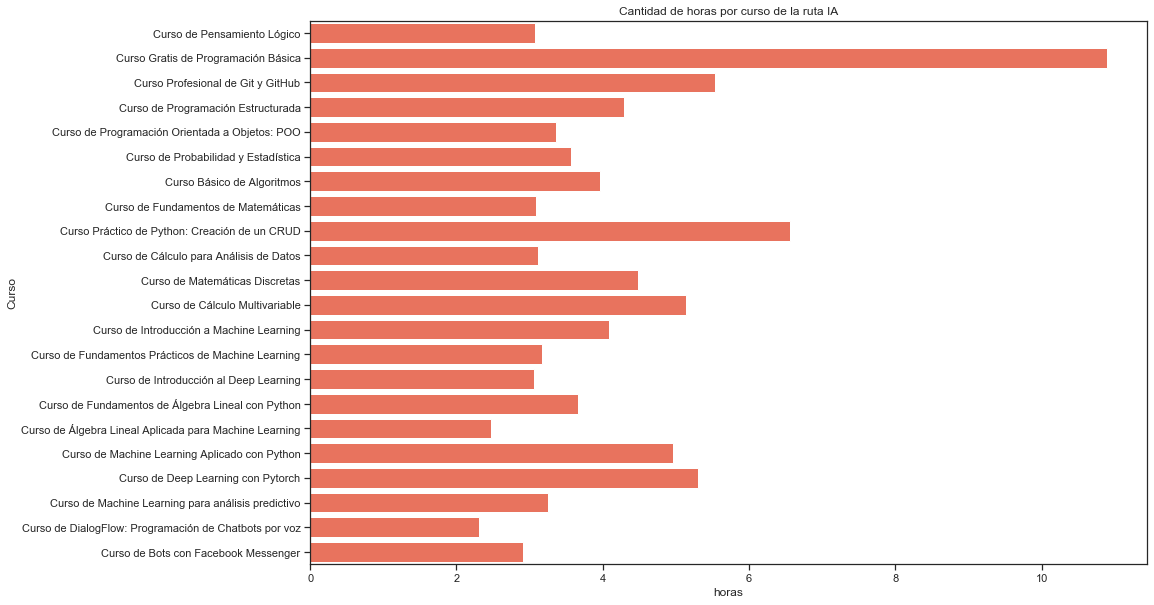

In [10]:
sns.set(style="ticks")
plt.figure(figsize=(15,10))
ax = sns.barplot(x='horas',y='Curso', data = df, color = 'tomato')
plt.title('Cantidad de horas por curso de la ruta IA')
plt.show()

In [11]:
duracion_total_carrera = np.sum(df['duracion_segundos'])
str(datetime.timedelta(seconds=int(duracion_total_carrera)))

'3 days, 20:17:00'

Lo mismo para la ruta de "Big Data y data Science"

In [12]:
cursos_url = [
    'https://platzi.com/clases/python-practico/',
    'https://platzi.com/clases/fundamentos-r/',
    'https://platzi.com/clases/bd/',
    'https://platzi.com/clases/sql-mysql/',
    'https://platzi.com/clases/db-aws/',
    'https://platzi.com/clases/ingenieria-datos/',
    'https://platzi.com/clases/scikit/',
    'https://platzi.com/clases/big-data/',
    'https://platzi.com/clases/data/'
    ]

duraciones_segundos = []
titulos_cursos = []
orden = []
niveles = []
i = 0
for curso in cursos_url:
    titulos, dura, nivel = calcula_duracion_curso_platzi_2020(curso)
    duraciones_segundos.append(dura)
    titulos_cursos.append(titulos)
    niveles.append(nivel)
    i += 1
    orden.append(i)

In [13]:
durac_form = []
for dur in duraciones_segundos:
    durac_form.append(str(datetime.timedelta(seconds=dur)))

df = pd.DataFrame({
    "Orden_ruta": orden,
    "Curso": titulos_cursos,
    "duracion_segundos": duraciones_segundos,
    "Duración_form": durac_form,
    "Nivel": niveles,
    "url": cursos_url})

df_orden = df.sort_values(by='duracion_segundos', ascending=False)
df_orden = df_orden.loc[:, ['Curso', 'Duración_form', 'Nivel']]
df_orden



,Curso,Duración_form,Nivel
2,Fundamentos de Bases de Datos,8:12:16,Básico
0,Curso Práctico de Python: Creación de un CRUD,6:33:46,Básico
5,Curso de Ingeniería de Datos con Python,5:22:00,Básico
6,Curso de Machine Learning Aplicado con Python,4:57:45,Básico
7,Curso de Big Data en AWS,4:43:25,Intermedio
1,Fundamentos de R,4:29:27,Básico
3,Curso de SQL y MySQL,3:58:52,Intermedio
8,Curso Profesional de Ciencia de Datos,3:16:33,Básico
4,Curso de Bases de Datos en AWS,3:07:27,Básico


In [14]:
df.loc[:,['Curso', 'Duración_form', 'Nivel']]

,Curso,Duración_form,Nivel
0,Curso Práctico de Python: Creación de un CRUD,6:33:46,Básico
1,Fundamentos de R,4:29:27,Básico
2,Fundamentos de Bases de Datos,8:12:16,Básico
3,Curso de SQL y MySQL,3:58:52,Intermedio
4,Curso de Bases de Datos en AWS,3:07:27,Básico
5,Curso de Ingeniería de Datos con Python,5:22:00,Básico
6,Curso de Machine Learning Aplicado con Python,4:57:45,Básico
7,Curso de Big Data en AWS,4:43:25,Intermedio
8,Curso Profesional de Ciencia de Datos,3:16:33,Básico


In [15]:
df['horas'] = df['duracion_segundos']/3600

In [16]:
df

,Orden_ruta,Curso,duracion_segundos,Duración_form,Nivel,url,horas
0,1,Curso Práctico de Python: Creación de un CRUD,23626,6:33:46,Básico,https://platzi.com/clases/python-practico/,6.562778
1,2,Fundamentos de R,16167,4:29:27,Básico,https://platzi.com/clases/fundamentos-r/,4.490833
2,3,Fundamentos de Bases de Datos,29536,8:12:16,Básico,https://platzi.com/clases/bd/,8.204444
3,4,Curso de SQL y MySQL,14332,3:58:52,Intermedio,https://platzi.com/clases/sql-mysql/,3.981111
4,5,Curso de Bases de Datos en AWS,11247,3:07:27,Básico,https://platzi.com/clases/db-aws/,3.124167
5,6,Curso de Ingeniería de Datos con Python,19320,5:22:00,Básico,https://platzi.com/clases/ingenieria-datos/,5.366667
6,7,Curso de Machine Learning Aplicado con Python,17865,4:57:45,Básico,https://platzi.com/clases/scikit/,4.962500
7,8,Curso de Big Data en AWS,17005,4:43:25,Intermedio,https://platzi.com/clases/big-data/,4.723611
8,9,Curso Profesional de Ciencia de Datos,11793,3:16:33,Básico,https://platzi.com/clases/data/,3.275833


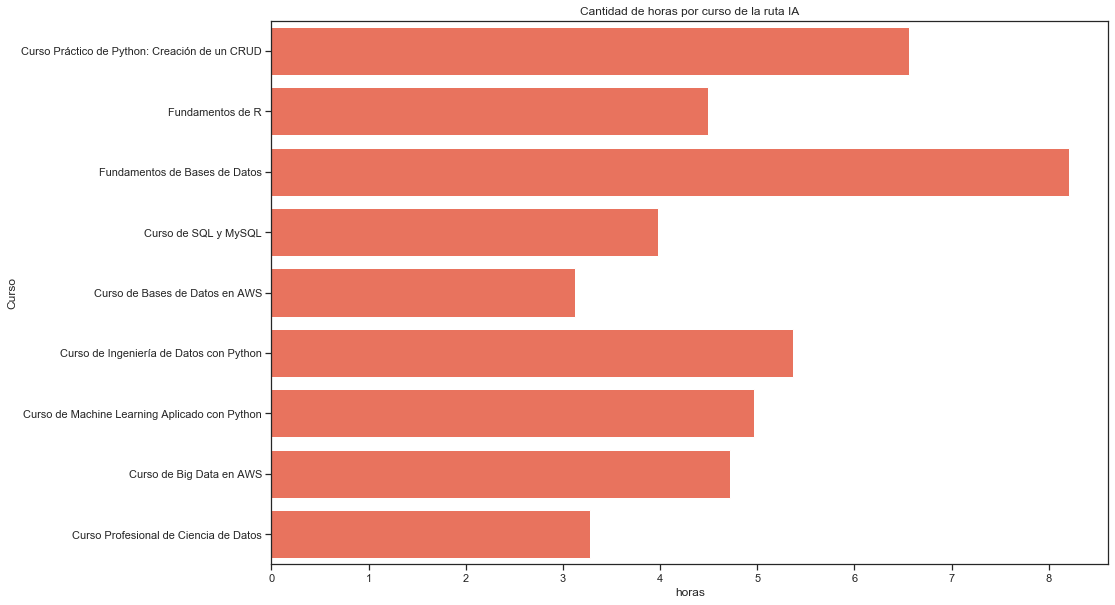

In [17]:
sns.set(style="ticks")
plt.figure(figsize=(15,10))
ax = sns.barplot(x='horas',y='Curso', data = df, color = 'tomato')
plt.title('Cantidad de horas por curso de la ruta IA')
plt.show()

In [18]:
duracion_total_carrera = np.sum(df['duracion_segundos'])
str(datetime.timedelta(seconds=int(duracion_total_carrera)))

'1 day, 20:41:31'

In [19]:
url_3 = 'https://platzi.com/clases/scikitlearn-ml/'
titulos, dura, nivel = calcula_duracion_curso_platzi_2020(url_3)
titulos, dura, nivel

('Curso Profesional de Machine Learning con SciKit-Learn', 4498, 'Básico')

In [20]:
str(datetime.timedelta(seconds=dura))

'1:14:58'

In [21]:
def get_url(url):
    # Getting the webpage, creating a Response object.
    response = requests.get(url)
 
    # Extracting the source code of the page.
    data = response.text
 
    # Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
    soup = BeautifulSoup(data, 'lxml')
 
    # Extracting all the <a> tags into a list.
    tags = soup.find_all('a')
 
    # Extracting URLs from the attribute href in the <a> tags.
    for tag in tags:
        print(tag.get('href'))

In [22]:
url = 'https://platzi.com/'
get_url(url)

/cdn-cgi/l/email-protection
/cdn-cgi/l/email-protection#7b0f1e1a163b0b171a0f011255181416
https://platzi.com/whatsapp
https://www.messenger.com/t/platzi
/
/cursos/
/blog/
/foro/
/agenda/
/live/
/login/
/precios/
/clases/1140-diseno-interfaces-ux-2017/7411-introduccion-a-ux/
/clases/1328-introduccion-marketing/12361-bienvenida-e-introduccion/
/clases/1050-programacion-basica/25972-recap-programacion-basica/
/clases/1098-ingenieria/6552-que-es-un-system-on-a-chip/
/categorias/desarrollo/
/categorias/crecimiento-profesional/
/categorias/negocios/
/categorias/produccion-audiovisual/
/categorias/marketing/
/categorias/diseno/
/cursos/construccion-marca
/cursos/construccion-marca
/cursos/ibm-watson
/cursos/wordpress-profesional
/cursos/accesibilidad-web
/cursos/spa-javascript
/cursos/scikitlearn-ml
/cursos/pwa-angular
/cursos/avanzado-redes
/cursos/materialize
/cursos/scope
/cursos/malware
/cursos/diseno-videojuegos
/cursos/fundamentos-wordpress
/cursos/texturizado-videojuegos
/cursos/ecmascr